In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('AltyZH/Analytical_data')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
36,NaN,None
155,NaN,sql
155,NaN,python
155,NaN,unix
155,NaN,excel


In [4]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending = False)
df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})
DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/DA_job_count*100

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,714,87500.0,5.068863
excel,472,77500.0,3.350845
python,408,90000.0,2.896493
tableau,398,90000.0,2.825500
power bi,279,87500.0,1.980690
...,...,...,...
tidyr,0,NaN,0.000000
vmware,0,NaN,0.000000
unity,0,NaN,0.000000


In [5]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending = False)
df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})
DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/DA_job_count*100

skill_percent = 0.5

df_DA_skill_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skill_high_demand


,skill_count,median_salary,skill_percent
job_skills,,,
sql,714,87500.0,5.068863
excel,472,77500.0,3.350845
python,408,90000.0,2.896493
tableau,398,90000.0,2.825500
power bi,279,87500.0,1.980690
r,244,90000.0,1.732216
sas,200,84078.5,1.419849
powerpoint,102,77500.0,0.724123
word,89,75000.0,0.631833


In [6]:
!pip install adjustText

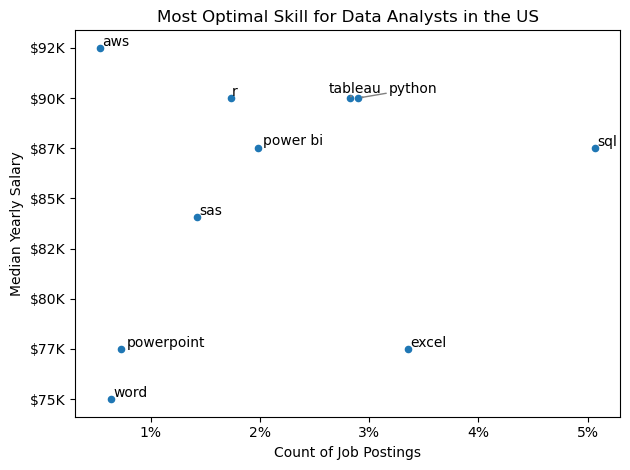

In [8]:


from adjustText import adjust_text

df_DA_skill_high_demand.plot(kind = 'scatter', x = 'skill_percent' , y = 'median_salary')

texts = []
for i, txt in enumerate(df_DA_skill_high_demand.index):
    texts.append(plt.text(df_DA_skill_high_demand['skill_percent'].iloc[i], df_DA_skill_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops = dict(arrowstyle = '->', color = 'gray'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skill for Data Analysts in the US')


from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.tight_layout()
plt.show()




In [ ]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict


{'analyst_tools': ['dax',
  'ssis',
  'outlook',
  'power bi',
  'powerbi',
  'microstrategy',
  'spss',
  'msaccess',
  'qlik',
  'sas',
  'sharepoint',
  'sheets',
  'cognos',
  'visio',
  'powerpoint',
  'excel',
  'ssrs',
  'ms access',
  'splunk',
  'spreadsheet',
  'tableau',
  'looker',
  'nuix',
  'sap',
  'datarobot',
  'word',
  'alteryx',
  'esquisse'],
 'programming': ['sass',
  'python',
  'javascript',
  'julia',
  'powershell',
  'c#',
  'mongo',
  'shell',
  'objective-c',
  'assembly',
  'vba',
  'lisp',
  'r',
  'erlang',
  'no-sql',
  'html',
  'golang',
  'fortran',
  'rust',
  'crystal',
  'sas',
  'cobol',
  'ruby',
  'php',
  'matlab',
  'dart',
  'scala',
  'clojure',
  'visualbasic',
  'java',
  'swift',
  'typescript',
  'vb.net',
  'kotlin',
  'elixir',
  'apl',
  'nosql',
  'delphi',
  'c',
  'c++',
  'pascal',
  'go',
  'mongodb',
  'perl',
  'visual basic',
  'solidity',
  'haskell',
  'css',
  'lua',
  'f#',
  'groovy',
  'sql',
  't-sql',
  'ocaml',
  'b

In [68]:

df_technology = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,dax
0,analyst_tools,ssis
0,analyst_tools,outlook
0,analyst_tools,power bi
0,analyst_tools,powerbi
...,...,...
9,sync,mattermost
9,sync,rocketchat
9,sync,microsoft teams
9,sync,wire


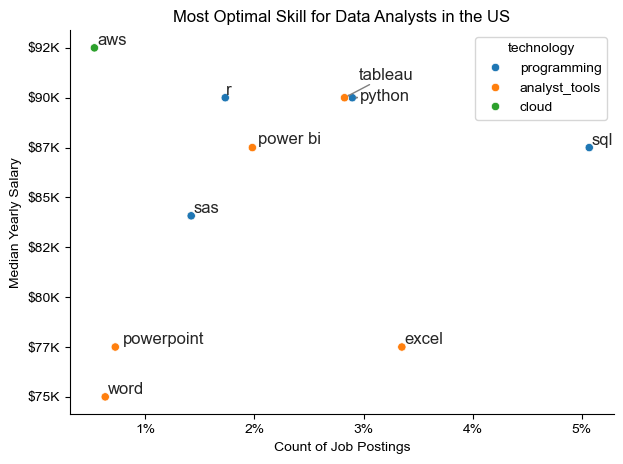

In [76]:
df_plot = df_DA_skill_high_demand.merge(df_technology, left_on= 'job_skills' , right_on='skills' )

from adjustText import adjust_text

#df_plot.plot(kind = 'scatter', x = 'skill_percent' , y = 'median_salary')
sns.scatterplot(
    data = df_plot,
    x = 'skill_percent',
    y = 'median_salary',
    hue = 'technology'
)

sns.despine()
sns.set_theme(style = 'ticks')

texts = []
for i, txt in enumerate(df_DA_skill_high_demand.index):
    texts.append(plt.text(df_DA_skill_high_demand['skill_percent'].iloc[i], df_DA_skill_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops = dict(arrowstyle = '->', color = 'gray'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skill for Data Analysts in the US')


from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.tight_layout()
plt.show()